ABRAR AKBAR MULLA
2023A7PS0173U

k=0.04: threshold=650303.7600, max_R=65030376.0000, mean_R=177413.3750, count=3555, pct_above=3.2711%, sum_above=19093258240.0000
k=0.1: threshold=317766.8000, max_R=31776680.0000, mean_R=15863.6348, count=2682, pct_above=2.4678%, sum_above=8576318464.0000
k=0.2: threshold=81326.2000, max_R=8132620.0000, mean_R=-156547.9062, count=1137, pct_above=1.0462%, sum_above=895552960.0000


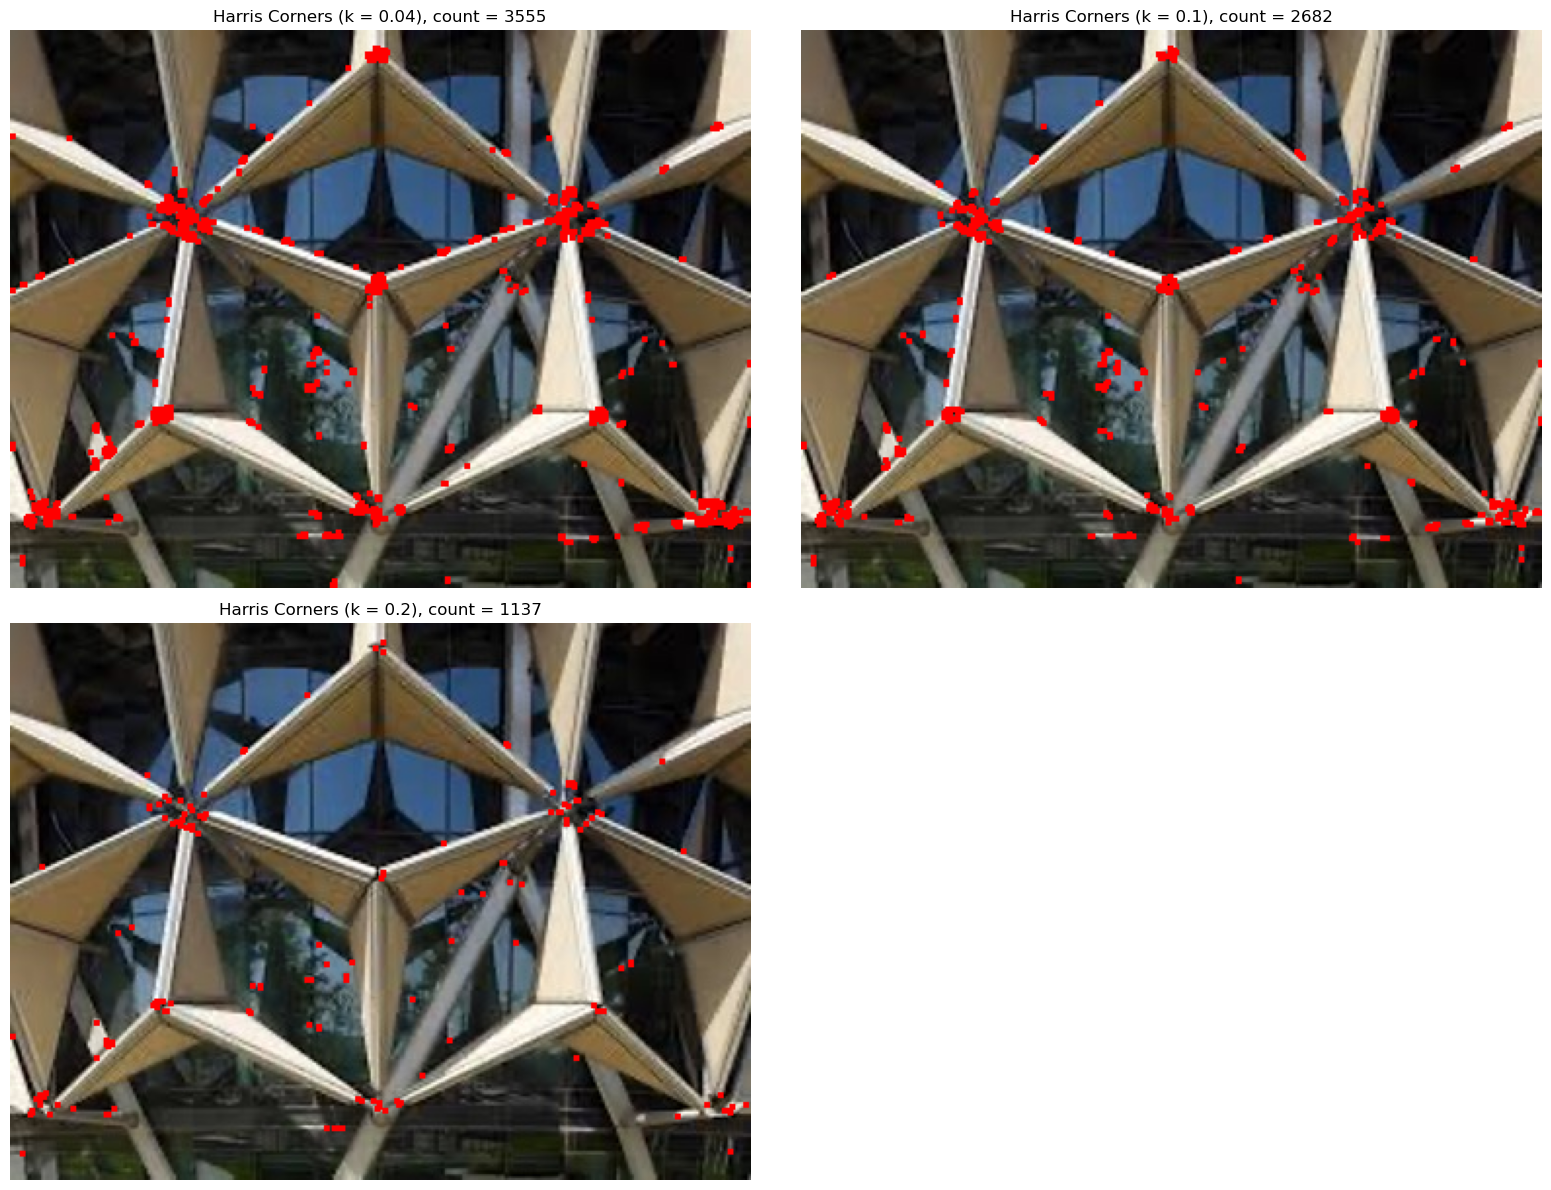

k = 0.04: 3555 corners detected
k = 0.1: 2682 corners detected
k = 0.2: 1137 corners detected


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = "Q2.jpg"
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

ks = [0.04, 0.10, 0.20]
corner_counts = {}

plt.figure(figsize=(16, 12))

for i, k in enumerate(ks, 1):
    R = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=k)
    R = cv2.dilate(R, None)

    threshold = 0.01 * R.max()
    corners = R > threshold

    count = int(np.sum(corners))
    corner_counts[k] = count

    # additional threshold diagnostics
    max_R = float(R.max())
    mean_R = float(R.mean())
    sum_above = float(R[corners].sum()) if count > 0 else 0.0
    pct_above = 100.0 * count / (R.size)

    print(f"k={k}: threshold={threshold:.4f}, max_R={max_R:.4f}, mean_R={mean_R:.4f}, count={count}, pct_above={pct_above:.4f}%, sum_above={sum_above:.4f}")

    img_corners = img.copy()
    img_corners[corners] = [0, 0, 255]

    plt.subplot(2, 2, i)
    plt.imshow(cv2.cvtColor(img_corners, cv2.COLOR_BGR2RGB))
    plt.title(f"Harris Corners (k = {k}), count = {count}")
    plt.axis("off")

plt.tight_layout()
plt.show()

for k, c in corner_counts.items():
    print(f"k = {k}: {c} corners detected")
# ...existing code...